<a href="https://colab.research.google.com/github/ezzat123-create/ML-55-19210/blob/main/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NETW 1013 Clustering Project

**Objective:**
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers:
* Which clustering approach have you decided to use on each dataset?
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques?






Running this project requires the following imports:

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *
# StandardScaler is a function to normalize the data
# You may also check MinMaxScaler and MaxAbsScaler
#from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

%matplotlib inline
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



### Kmeans
* Use Kmeans with different values of K to cluster the above data.
* Display the outcome of each value of K.
* Plot distortion function versus K and choose the approriate value of K.
* Plot the silhouette_score versus K and use it to choose the best K.
* Store the silhouette_score for the best K for later comparison with other clustering techniques.
* Comment on the effect of centroid initialization on cluster assignment.
* Hint: Lookup k-means++ .

In [ ]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
#display_cluster(Multi_blob_Data)

In [ ]:
Multi_blob_Data


array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [ ]:
ssd = []  # Stores the SSD values (Inertia)
silhouette_scores = []  # Stores silhouette scores

K_values = range(2, 10)  # Trying K from 2 to 9

for k in K_values:
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(Multi_blob_Data)

    # Append Sum of Squared Distances (SSD)
    ssd.append(model.inertia_)

    # Compute Silhouette Score (only if K > 1)
    silhouette_scores.append(silhouette_score(Multi_blob_Data, model.labels_))

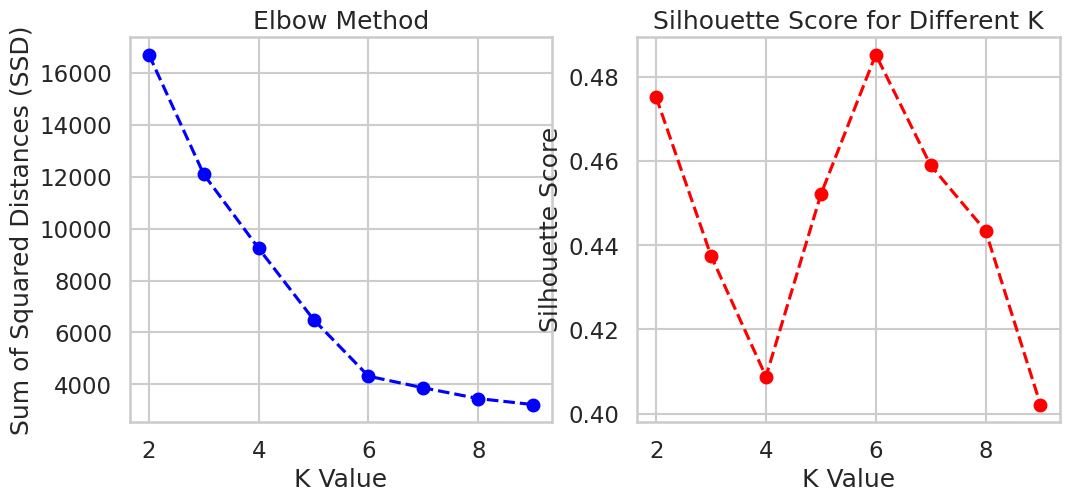

In [ ]:
# Create subplots for SSD and Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot SSD (Elbow Method)
ax[0].plot(K_values, ssd, 'o--', color='blue')
ax[0].set_xlabel("K Value")
ax[0].set_ylabel("Sum of Squared Distances (SSD)")
ax[0].set_title("Elbow Method")

# Plot Silhouette Score
ax[1].plot(K_values, silhouette_scores, 'o--', color='red')
ax[1].set_xlabel("K Value")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Score for Different K")

plt.show()

In [ ]:
model = KMeans(n_clusters=6,init='k-means++')
cluster_labels = model.fit_predict(Multi_blob_Data)

# Compute the silhouette score for the final model
silhouette_avg = silhouette_score(Multi_blob_Data, cluster_labels)
print(f"Silhouette Score for K=6: {silhouette_avg}")

Silhouette Score for K=6: 0.4279280459334202


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques.
* Record your observation.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Define parameter lists
distance_thresholds = np.linspace( 1.0 , 10.0 , 20)
linkage_list = [ "average", "complete", "single"]
affinity_list = ["euclidean", "manhattan", "cosine"]

# Store silhouette scores for plotting
silhouette_scores = []
best=-1
best_affinity=" "
best_n=1
best_linkage= " "

# Loop through different parameter combinations
for distance_threshold in distance_thresholds:
    for linkage_method in linkage_list:
        for metric in affinity_list:


            # Apply Agglomerative Clustering
            model = AgglomerativeClustering(n_clusters=None,distance_threshold=distance_threshold, metric=metric, linkage=linkage_method)
            labels = model.fit_predict(Multi_blob_Data)  # Get cluster labels
           # model = model.fit(Multi_blob_Data)
             # Count the number of unique clusters
            num_clusters = len(set(labels))

            # Compute silhouette score
            if num_clusters > 1:
             silhouette = silhouette_score(Multi_blob_Data,labels)
             silhouette_scores.append((distance_threshold, linkage_method, metric, silhouette))
             if silhouette >= best:
                    best_n=distance_threshold
                    best =silhouette
                    best_affinity=metric
                    best_linkage=linkage_method

            # Display results
             print(f"distance: {distance_threshold}, Linkage: {linkage_method}, Affinity: {metric},number:{num_clusters}, Silhouette Score: {silhouette:.4f}")


distance: 1.0, Linkage: average, Affinity: euclidean,number:115, Silhouette Score: 0.3238
distance: 1.0, Linkage: average, Affinity: manhattan,number:166, Silhouette Score: 0.3409
distance: 1.0, Linkage: average, Affinity: cosine,number:2, Silhouette Score: 0.3525
distance: 1.0, Linkage: complete, Affinity: euclidean,number:209, Silhouette Score: 0.3467
distance: 1.0, Linkage: complete, Affinity: manhattan,number:281, Silhouette Score: 0.3486
distance: 1.0, Linkage: complete, Affinity: cosine,number:6, Silhouette Score: 0.1885
distance: 1.0, Linkage: single, Affinity: euclidean,number:9, Silhouette Score: -0.1494
distance: 1.0, Linkage: single, Affinity: manhattan,number:16, Silhouette Score: -0.4080
distance: 1.4736842105263157, Linkage: average, Affinity: euclidean,number:59, Silhouette Score: 0.2950
distance: 1.4736842105263157, Linkage: average, Affinity: manhattan,number:92, Silhouette Score: 0.3081
distance: 1.4736842105263157, Linkage: average, Affinity: cosine,number:2, Silhoue

### DBScan
* Use DBScan function to  to cluster the above data.
* In the  DBscan change the following parameters:
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case.
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques.
* Record your observations and comments.

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [ ]:
eps_values = np.linspace(0.1, 3, 15)  # 15 values from 0.1 to 3
min_samples_values = np.arange(5, 26, 5)  # Values from 5 to 25 in steps of 5

silhouette_scores = []

for i, eps in enumerate (eps_values):
    for j , min_samples in enumerate (min_samples_values):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(Multi_blob_Data)
        unique_labels = set(labels)
        # Check if there are at least 2 clusters (Silhouette score requires >1 cluster)
        if len(set(labels)) > 1:
            score = silhouette_score(Multi_blob_Data, labels)
            silhouette_scores.append((eps, min_samples, score))



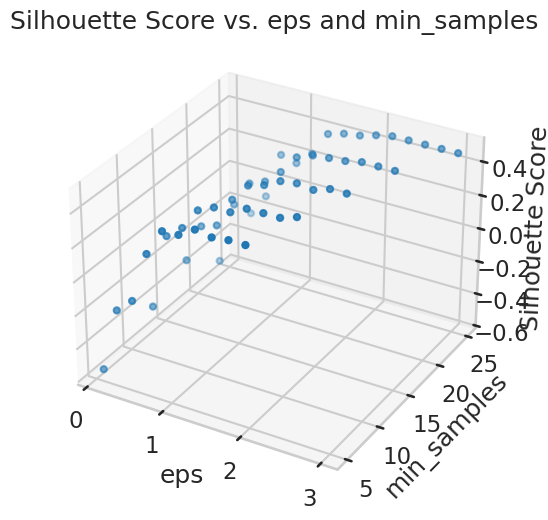

Best eps: 2.1714285714285713, Best min_samples: 10, Best Silhouette Score: 0.4685207355522043


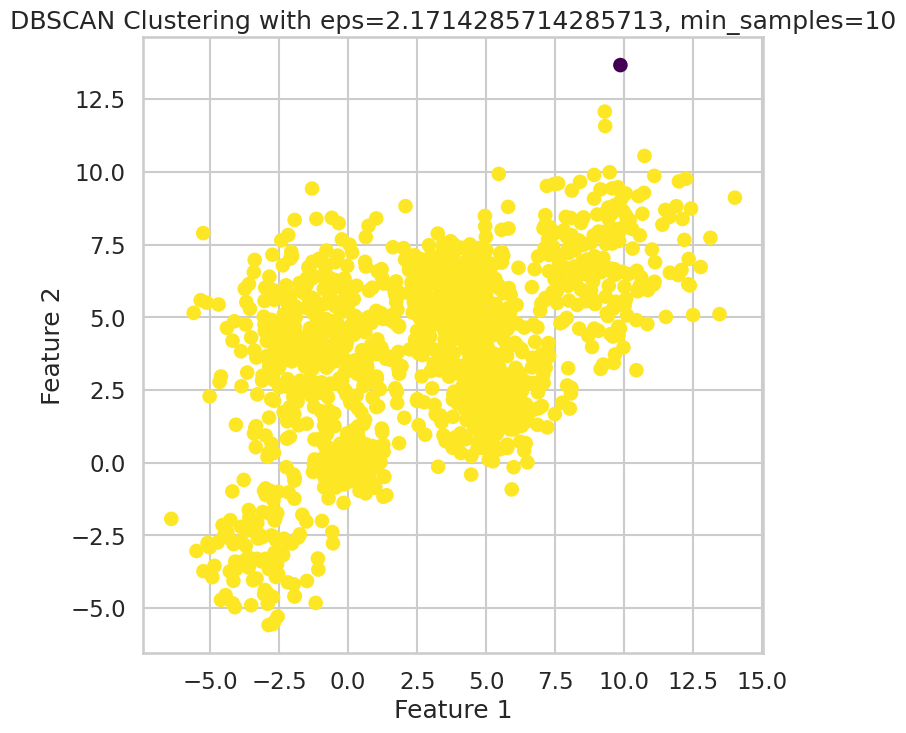

In [ ]:
# prompt: Plot the silhouette_score versus the variation in the EPS and the min_samples.
# Plot the resulting Clusters in this case. :
# considering that code
# from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt
# eps_values = np.linspace(0.1, 3, 15)  # 15 values from 0.1 to 3
# min_samples_values = np.arange(5, 26, 5)  # Values from 5 to 25 in steps of 5
# silhouette_scores = []
# for i, eps in enumerate (eps_values):
#     for j , min_samples in enumerate (min_samples_values):
#         model = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = model.fit_predict(Multi_blob_Data)
#         unique_labels = set(labels)
#         # Check if there are at least 2 clusters (Silhouette score requires >1 cluster)
#         if len(set(labels)) > 1:
#             score = silhouette_score(Multi_blob_Data, labels)
#             silhouette_scores.append((eps, min_samples, score))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

eps_values = [x[0] for x in silhouette_scores]
min_samples_values = [x[1] for x in silhouette_scores]
scores = [x[2] for x in silhouette_scores]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eps_values, min_samples_values, scores)
ax.set_xlabel('eps')
ax.set_ylabel('min_samples')
ax.set_zlabel('Silhouette Score')
ax.set_title('Silhouette Score vs. eps and min_samples')
plt.show()

# Find the best parameters
best_params = max(silhouette_scores, key=lambda x: x[2])
best_eps, best_min_samples, best_score = best_params

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")

# Plot the clusters using the best parameters
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(Multi_blob_Data)

plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=best_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'DBSCAN Clustering with eps={best_eps}, min_samples={best_min_samples}')
plt.show()


In [ ]:
# prompt: Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques for the that code :
# eps_values = np.linspace(0.1, 3, 15)  # 15 values from 0.1 to 3
# min_samples_values = np.arange(5, 26, 5)  # Values from 5 to 25 in steps of 5
# silhouette_scores = []
# for i, eps in enumerate (eps_values):
#     for j , min_samples in enumerate (min_samples_values):
#         model = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = model.fit_predict(Multi_blob_Data)
#         unique_labels = set(labels)
#         # Check if there are at least 2 clusters (Silhouette score requires >1 cluster)
#         if len(set(labels)) > 1:
#             score = silhouette_score(Multi_blob_Data, labels)
#             silhouette_scores.append((eps, min_samples, score))

# Find the best parameters
best_params = max(silhouette_scores, key=lambda x: x[2])
best_eps, best_min_samples, best_score = best_params

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")
# Store the best silhouette score for later comparison
best_dbscan_silhouette = best_score


Best eps: 2.1714285714285713, Best min_samples: 10, Best Silhouette Score: 0.4685207355522043


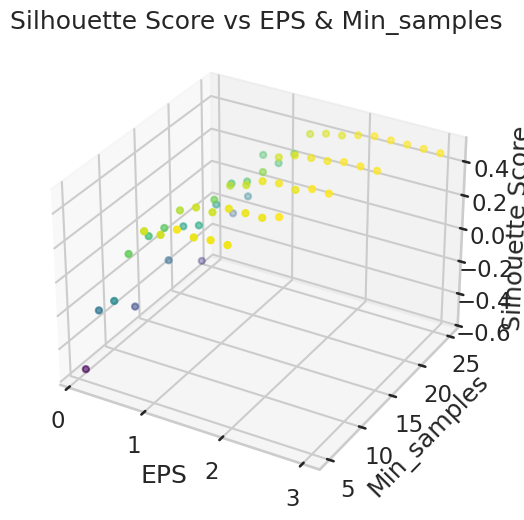

In [ ]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Convert results into DataFrame for easy plotting
df = pd.DataFrame(silhouette_scores, columns=["EPS", "Min_samples", "Silhouette"])

# 3D Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["EPS"], df["Min_samples"], df["Silhouette"], c=df["Silhouette"], cmap="viridis")

ax.set_xlabel("EPS")
ax.set_ylabel("Min_samples")
ax.set_zlabel("Silhouette Score")
ax.set_title("Silhouette Score vs EPS & Min_samples")

plt.show()


In [ ]:
# Find best parameters (highest silhouette score)
best_params = max(silhouette_scores, key=lambda x: x[2])
print(f"Best Parameters: EPS={best_params[0]}, Min_samples={best_params[1]}, Silhouette Score={best_params[2]:.4f}")


Best Parameters: EPS=2.1714285714285713, Min_samples=10.0, Silhouette Score=0.4685


In [ ]:
dbscan = DBSCAN(eps=2.1714285714285713 ,min_samples=10)
cluster_labels_dbscan = dbscan.fit_predict(Multi_blob_Data)


# Check if there's more than one cluster (excluding noise points)
n_clusters_dbscan = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)

if n_clusters_dbscan > 1:
    silhouette_avg_dbscan = silhouette_score(Multi_blob_Data, cluster_labels_dbscan)
    print(f"Silhouette Score for DBSCAN (eps=2 , min_samples=10): {silhouette_avg_dbscan}")
else:
    print("Silhouette score cannot be calculated for DBSCAN with eps=1.5 because less than two clusters were found (excluding noise).")


Silhouette score cannot be calculated for DBSCAN with eps=1.5 because less than two clusters were found (excluding noise).


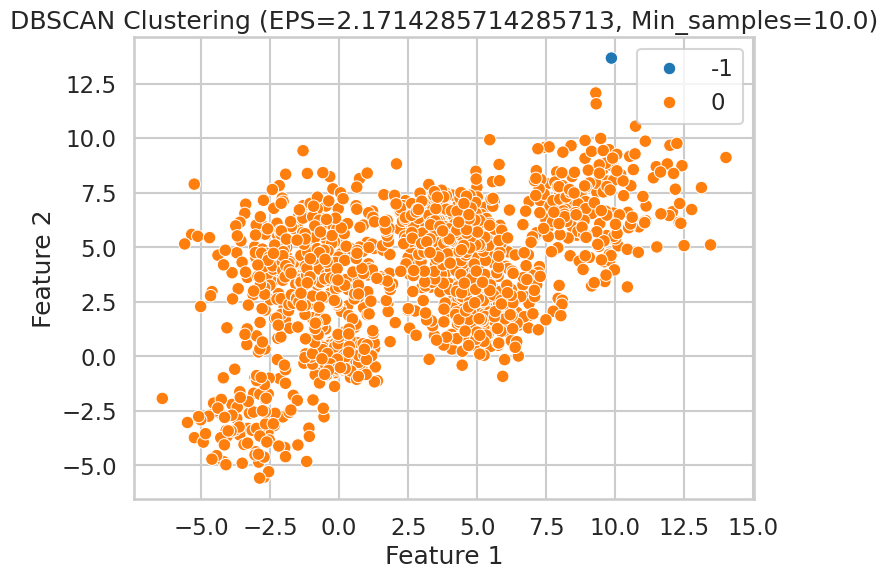

## iris data set
The iris data set is test data set that is part of the Sklearn module
which contains 150 records each with 4 features. All the features are represented by real numbers.

The data represents three classes.


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [ ]:
# prompt: output the data of irirs withpout labels

import pandas as pd
from sklearn.datasets import load_iris

iris_data = load_iris()
df = pd.DataFrame(iris_data.data)
df.head()


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# prompt: scaled that data:
# # prompt: output the data of irirs withpout labels
# import pandas as pd
# from sklearn.datasets import load_iris
# iris_data = load_iris()
# df = pd.DataFrame(iris_data.data)
# df.head()

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame from the previous code
# df = pd.DataFrame(iris_data.data)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Print or use the scaled DataFrame
print(scaled_df.head())


          0         1         2         3
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444


In [ ]:
ssd = []  # Stores the SSD values (Inertia)
silhouette_scores = []  # Stores silhouette scores

K_values = range(2, 10)  # Trying K from 2 to 9

for k in K_values:
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(df)

    # Append Sum of Squared Distances (SSD)
    ssd.append(model.inertia_)

    # Compute Silhouette Score (only if K > 1)
    silhouette_scores.append(silhouette_score(df, model.labels_))

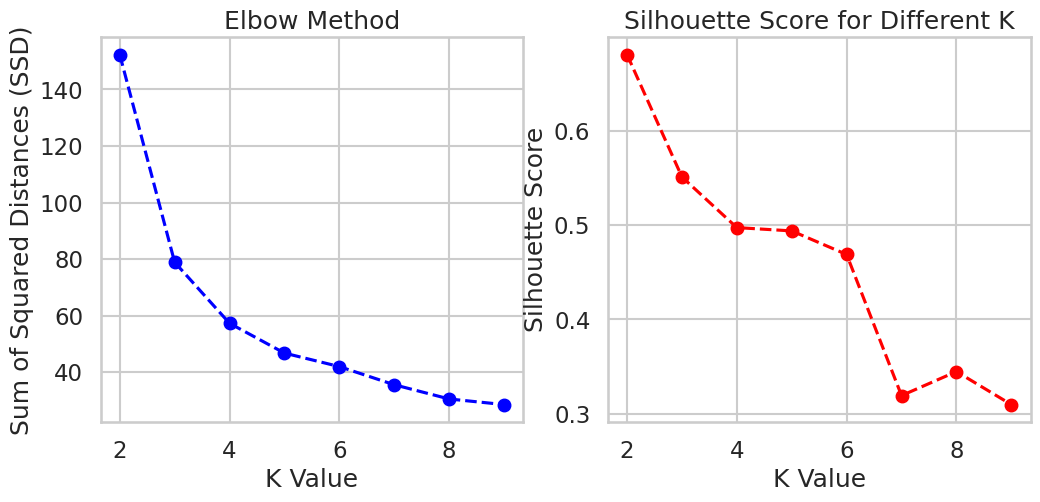

In [ ]:
# Create subplots for SSD and Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot SSD (Elbow Method)
ax[0].plot(K_values, ssd, 'o--', color='blue')
ax[0].set_xlabel("K Value")
ax[0].set_ylabel("Sum of Squared Distances (SSD)")
ax[0].set_title("Elbow Method")

# Plot Silhouette Score
ax[1].plot(K_values, silhouette_scores, 'o--', color='red')
ax[1].set_xlabel("K Value")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Score for Different K")

plt.show()

In [ ]:
model = KMeans(n_clusters=3,init='k-means++')
cluster_labels = model.fit_predict(df)

# Compute the silhouette score for the final model
silhouette_avg = silhouette_score(df, cluster_labels)
print(f"Silhouette Score for K=3: {silhouette_avg}")

Silhouette Score for K=3: 0.551191604619592


In [ ]:
ssd = []  # Stores the SSD values (Inertia)
silhouette_scores = []  # Stores silhouette scores

K_values = range(2, 10)  # Trying K from 2 to 9

for k in K_values:
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(scaled_df)

    # Append Sum of Squared Distances (SSD)
    ssd.append(model.inertia_)

    # Compute Silhouette Score (only if K > 1)
    silhouette_scores.append(silhouette_score(scaled_df, model.labels_))

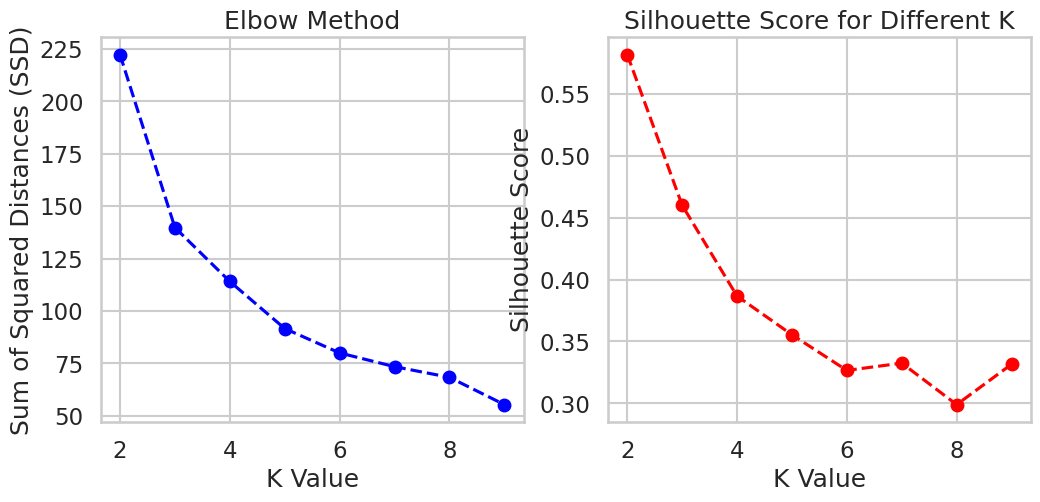

In [ ]:
# Create subplots for SSD and Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot SSD (Elbow Method)
ax[0].plot(K_values, ssd, 'o--', color='blue')
ax[0].set_xlabel("K Value")
ax[0].set_ylabel("Sum of Squared Distances (SSD)")
ax[0].set_title("Elbow Method")

# Plot Silhouette Score
ax[1].plot(K_values, silhouette_scores, 'o--', color='red')
ax[1].set_xlabel("K Value")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Score for Different K")

plt.show()

In [ ]:
model = KMeans(n_clusters=3,init='k-means++')
cluster_labels = model.fit_predict(scaled_df)

# Compute the silhouette score for the final model
silhouette_avg = silhouette_score(df, cluster_labels)
print(f"Silhouette Score for K=3: {silhouette_avg}")

Silhouette Score for K=3: 0.49755820341153567


* Repeat all the above clustering approaches and steps on the above data.
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches.
* Is your clustering outcome consistent with the labels?

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Define parameter lists
distance_thresholds = np.linspace( 1 , 13 , 50)
linkage_list = [ "average", "complete", "single"]
affinity_list = ["euclidean", "manhattan", "cosine"]

# Store silhouette scores for plotting
silhouette_scores = []
best=-1
best_affinity=" "
best_n=1
best_linkage= " "

# Loop through different parameter combinations
for distance_threshold in distance_thresholds:
    for linkage_method in linkage_list:
        for metric in affinity_list:


            # Apply Agglomerative Clustering
            model = AgglomerativeClustering(n_clusters=None,distance_threshold=distance_threshold, metric=metric, linkage=linkage_method)
            labels = model.fit_predict(df)  # Get cluster labels
           # model = model.fit(Multi_blob_Data)
             # Count the number of unique clusters
            num_clusters = len(set(labels))

            # Compute silhouette score
            if num_clusters > 1:
             silhouette = silhouette_score(df,labels)
             silhouette_scores.append((distance_threshold, linkage_method, metric, silhouette))
             if silhouette >= best:
                    best_n=distance_threshold
                    best_number =num_clusters
                    best =silhouette
                    best_affinity=metric
                    best_linkage=linkage_method

            # Display results
             #print(f"distance: {distance_threshold}, Linkage: {linkage_method}, Affinity: {metric},number:{num_clusters}, Silhouette Score: {silhouette:.4f}")
print("Best agglomerative clustering model for this data is distance threshold ="+" " + str(best_n)+" " +"with linkage of "
      +str(best_linkage)+ "  " + "no.clusters " + str(best_number)+" and affinity of "+str(best_affinity)+"." "Silhouette Score is "+str(best)+".")

Best agglomerative clustering model for this data is distance threshold = 6.63265306122449 with linkage of average  no.clusters 2 and affinity of manhattan.Silhouette Score is 0.6867350732769777.


In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
eps_values = np.linspace(0.1, 0.7, 25)  # 15 values from 0.1 to 3
min_samples_values = np.arange(2, 7, 1)  # Values from 5 to 25 in steps of 5

silhouette_scores = []

for i, eps in enumerate (eps_values):
    for j , min_samples in enumerate (min_samples_values):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df)
        unique_labels = set(labels)
        num_clusters = len(set(labels))
        # Check if there are at least 2 clusters (Silhouette score requires >1 cluster)
        if len(set(labels)) > 1:
            score = silhouette_score(df, labels)
            silhouette_scores.append((eps, min_samples, score))


Best eps: 0.575, Best min_samples: 6, Best Silhouette Score: 0.5455653321123303, Number of Clusters: 3


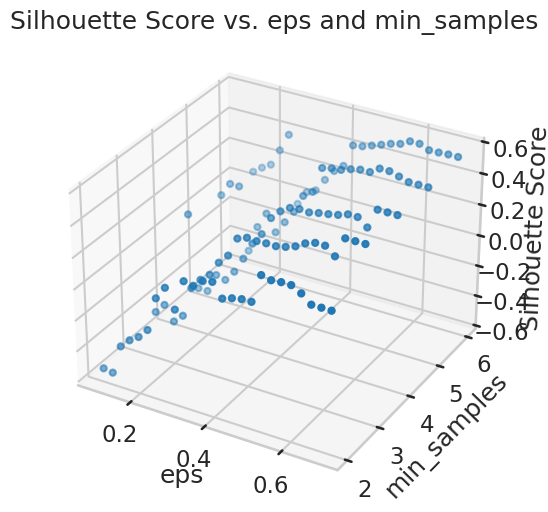

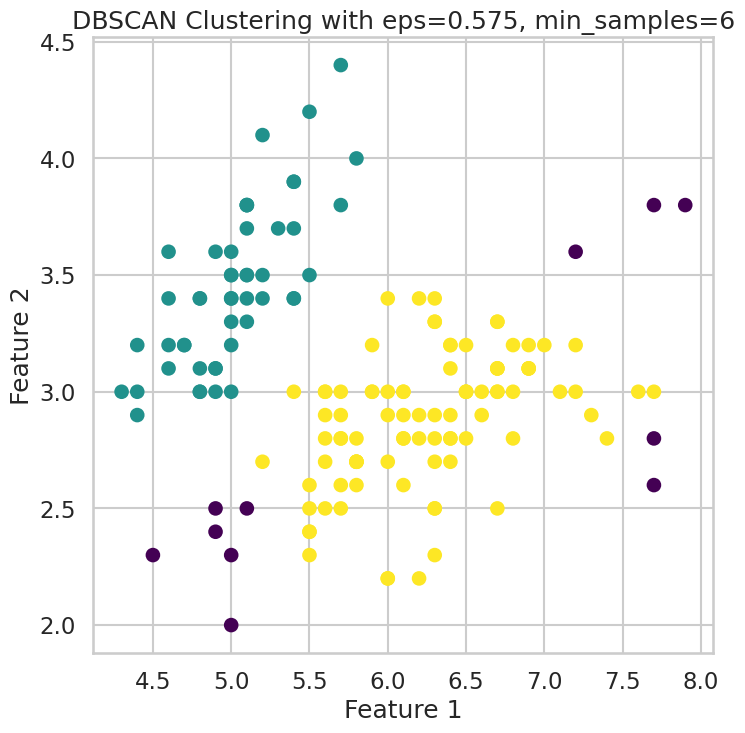

In [ ]:
# prompt: i want to on that code so that: Plot the silhouette_score versus the variation in the EPS and the min_samples.
# Plot the resulting Clusters in this case.
# Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques.
# Plot the silhouette_score versus the variation in the EPS and the min_samples.
# Plot the resulting Clusters in this case.
# Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques.
# from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt
# eps_values = np.linspace(0.1, 0.7, 25)  # 15 values from 0.1 to 3
# min_samples_values = np.arange(2, 7, 1)  # Values from 5 to 25 in steps of 5
# silhouette_scores = []
# for i, eps in enumerate (eps_values):
#     for j , min_samples in enumerate (min_samples_values):
#         model = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = model.fit_predict(df)
#         unique_labels = set(labels)
#         num_clusters = len(set(labels))
#         # Check if there are at least 2 clusters (Silhouette score requires >1 cluster)
#         if len(set(labels)) > 1:
#             score = silhouette_score(df, labels)
#             silhouette_scores.append((eps, min_samples, score))
# i want also to get the number of clusters for that best model

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ... (Your existing code) ...

eps_values = np.linspace(0.1, 0.7, 25)  # 15 values from 0.1 to 3
min_samples_values = np.arange(2, 7, 1)  # Values from 5 to 25 in steps of 5
silhouette_scores = []

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df)
        unique_labels = set(labels)
        num_clusters = len(set(labels))
        # Check if there are at least 2 clusters (Silhouette score requires >1 cluster)
        if len(set(labels)) > 1:
            score = silhouette_score(df, labels)
            silhouette_scores.append((eps, min_samples, score, num_clusters)) #Store number of clusters

#Find best parameters and number of clusters
best_params = max(silhouette_scores, key=lambda x: x[2])
best_eps, best_min_samples, best_score, best_n_clusters = best_params

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}, Number of Clusters: {best_n_clusters}")

#Plot Silhouette Score
eps_values = [x[0] for x in silhouette_scores]
min_samples_values = [x[1] for x in silhouette_scores]
scores = [x[2] for x in silhouette_scores]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eps_values, min_samples_values, scores)
ax.set_xlabel('eps')
ax.set_ylabel('min_samples')
ax.set_zlabel('Silhouette Score')
ax.set_title('Silhouette Score vs. eps and min_samples')
plt.show()

#Plot Clusters with best parameters
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=best_labels, cmap='viridis') # Assuming first two columns for plotting
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'DBSCAN Clustering with eps={best_eps}, min_samples={best_min_samples}')
plt.show()

#Store the best silhouette score
best_dbscan_silhouette = best_score


In [ ]:
dbscan = DBSCAN(eps=0.9285714285714285, min_samples= 2)
cluster_labels_dbscan = dbscan.fit_predict(df)

# Check if there's more than one cluster (excluding noise points)
n_clusters_dbscan = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)

if n_clusters_dbscan > 1:
    silhouette_avg_dbscan = silhouette_score(df, cluster_labels_dbscan)
    print(f"Silhouette Score for DBSCAN : {silhouette_avg_dbscan}")
else:
    print("Silhouette score cannot be calculated for DBSCAN  because less than two clusters were found (excluding noise).")

Silhouette Score for DBSCAN : 0.6867350732769777


## Customer dataset
Repeat all the above on the customer data set

In [ ]:
df1 = pd.read_csv('/content/Customer data.csv')

In [ ]:
df1.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df1 = df1.drop(columns=['ID'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(df1)

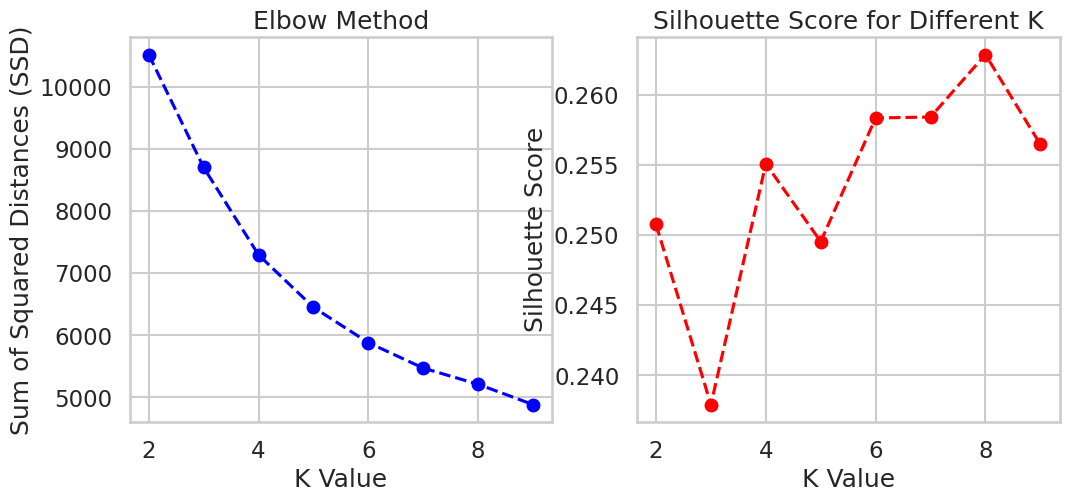

In [ ]:
ssd = []  # Stores the SSD values (Inertia)
silhouette_scores = []  # Stores silhouette scores

K_values = range(2, 10)  # Trying K from 2 to 9

for k in K_values:
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(scaled_df1)

    # Append Sum of Squared Distances (SSD)
    ssd.append(model.inertia_)

    # Compute Silhouette Score (only if K > 1)
    silhouette_scores.append(silhouette_score(scaled_df1, model.labels_))
# Create subplots for SSD and Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot SSD (Elbow Method)
ax[0].plot(K_values, ssd, 'o--', color='blue')
ax[0].set_xlabel("K Value")
ax[0].set_ylabel("Sum of Squared Distances (SSD)")
ax[0].set_title("Elbow Method")

# Plot Silhouette Score
ax[1].plot(K_values, silhouette_scores, 'o--', color='red')
ax[1].set_xlabel("K Value")
ax[1].set_ylabel("Silhouette Score")
ax[1].set_title("Silhouette Score for Different K")

plt.show()


In [ ]:
model = KMeans(n_clusters=4,init='k-means++')
cluster_labels = model.fit_predict(scaled_df1)

# Compute the silhouette score for the final model
silhouette_avg = silhouette_score(scaled_df1, cluster_labels)
print(f"Silhouette Score for K=6: {silhouette_avg}")

Silhouette Score for K=6: 0.26879180394522123


In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Define parameter lists
distance_thresholds = np.linspace( 2.5 , 10.0 , 30)
linkage_list = [ "average", "complete", "single"]
affinity_list = ["euclidean", "manhattan", "cosine"]

# Store silhouette scores for plotting
silhouette_scores = []
best=-1
best_affinity=" "
best_n=1
best_linkage= " "

# Loop through different parameter combinations
for distance_threshold in distance_thresholds:
    for linkage_method in linkage_list:
        for metric in affinity_list:


            # Apply Agglomerative Clustering
            model = AgglomerativeClustering(n_clusters=None,distance_threshold=distance_threshold, metric=metric, linkage=linkage_method)
            labels = model.fit_predict(scaled_df1)  # Get cluster labels
           # model = model.fit(Multi_blob_Data)
             # Count the number of unique clusters
            num_clusters = len(set(labels))

            # Compute silhouette score
            if num_clusters > 1:
             silhouette = silhouette_score(scaled_df1,labels)
             silhouette_scores.append((distance_threshold, linkage_method, metric, silhouette))
             if silhouette >= best:
                    best_n=distance_threshold
                    best =silhouette
                    best_affinity=metric
                    best_linkage=linkage_method

            # Display results
             #print(f"distance: {distance_threshold}, Linkage: {linkage_method}, Affinity: {metric},number:{num_clusters}, Silhouette Score: {silhouette:.4f}")
print("Best agglomerative clustering model for this data is distance threshold ="+" " + str(best_n)+" " +"with linkage of "
      +str(best_linkage)+ "  " + "no.clusters " + str(best_number)+" and affinity of "+str(best_affinity)+"." "Silhouette Score is "+str(best)+".")

Best agglomerative clustering model for this data is distance threshold = 4.310344827586207 with linkage of complete  no.clusters 2 and affinity of manhattan.Silhouette Score is 0.4585171015898142.


Best eps: 2.4482758620689653, Best min_samples: 25, Best Silhouette Score: 0.4266904137861316, Number of Clusters: 2


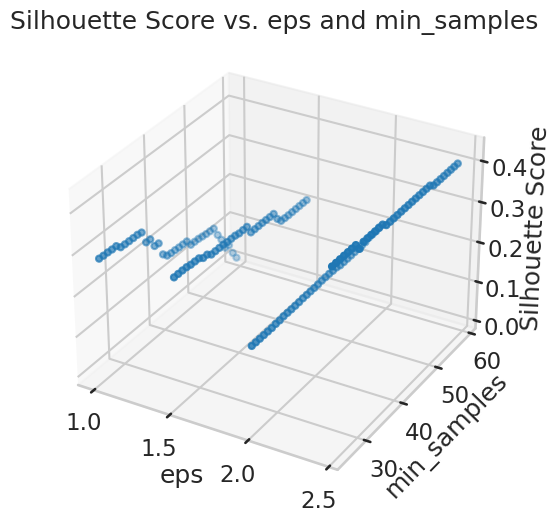

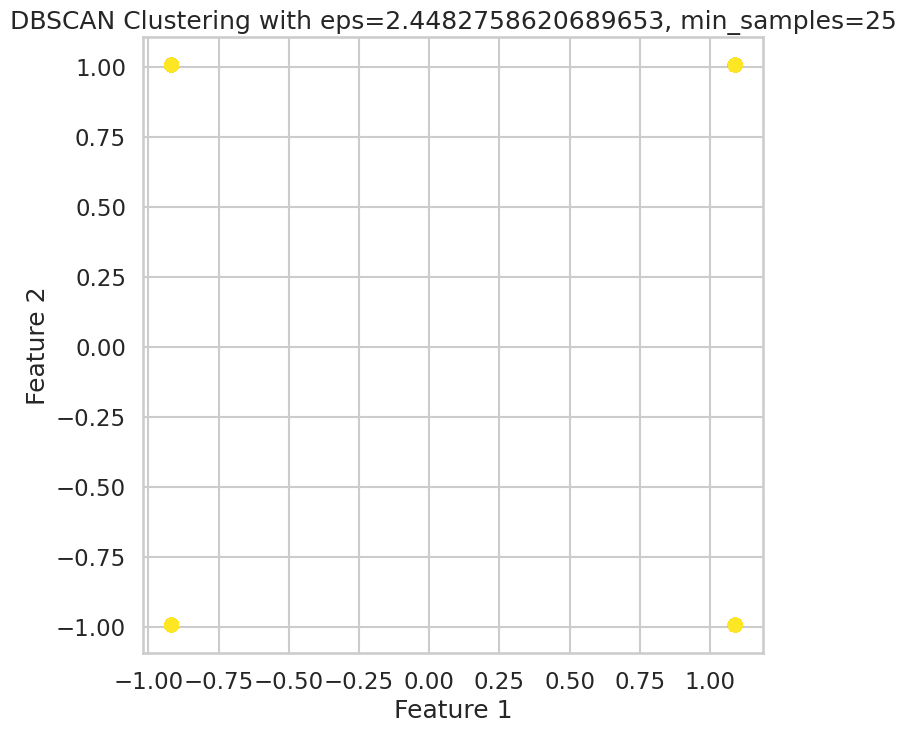

In [ ]:
eps_values = np.linspace(1, 15, 30)  # 15 values from 0.1 to 3
min_samples_values = np.arange(25, 60, 1)  # Values from 5 to 25 in steps of 5
silhouette_scores = []

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(scaled_df1)
        unique_labels = set(labels)
        num_clusters = len(set(labels))
        # Check if there are at least 2 clusters (Silhouette score requires >1 cluster)
        if len(set(labels)) > 1:
            score = silhouette_score(scaled_df1, labels)
            silhouette_scores.append((eps, min_samples, score, num_clusters)) #Store number of clusters

#Find best parameters and number of clusters
best_params = max(silhouette_scores, key=lambda x: x[2])
best_eps, best_min_samples, best_score, best_n_clusters = best_params

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}, Number of Clusters: {best_n_clusters}")

#Plot Silhouette Score
eps_values = [x[0] for x in silhouette_scores]
min_samples_values = [x[1] for x in silhouette_scores]
scores = [x[2] for x in silhouette_scores]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eps_values, min_samples_values, scores)
ax.set_xlabel('eps')
ax.set_ylabel('min_samples')
ax.set_zlabel('Silhouette Score')
ax.set_title('Silhouette Score vs. eps and min_samples')
plt.show()

#Plot Clusters with best parameters
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(scaled_df1)
plt.scatter(scaled_df1[:, 0], scaled_df1[:, 1], c=best_labels, cmap='viridis') # Assuming first two columns for plotting
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'DBSCAN Clustering with eps={best_eps}, min_samples={best_min_samples}')
plt.show()

#Store the best silhouette score
best_dbscan_silhouette = best_score